In [5]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
from Interpretation import Interpretation

In [8]:
interpreter = Interpretation()

Airbnb data:

In [9]:
data = pd.read_csv('data/airbnb.csv')

In [10]:
data.drop(['id', 'amenities', 'name', 'thumbnail_url', 'latitude', 'longitude', 'description'] , axis=1, inplace=True)

In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42775 entries, 1 to 74110
Data columns (total 22 columns):
log_price                 42775 non-null float64
property_type             42775 non-null object
room_type                 42775 non-null object
accommodates              42775 non-null int64
bathrooms                 42775 non-null float64
bed_type                  42775 non-null object
cancellation_policy       42775 non-null object
cleaning_fee              42775 non-null bool
city                      42775 non-null object
first_review              42775 non-null object
host_has_profile_pic      42775 non-null object
host_identity_verified    42775 non-null object
host_response_rate        42775 non-null object
host_since                42775 non-null object
instant_bookable          42775 non-null object
last_review               42775 non-null object
neighbourhood             42775 non-null object
number_of_reviews         42775 non-null int64
review_scores_rating      427

In [13]:
data = data.select_dtypes(include=['int64', 'float64'])

In [14]:
data.head()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
1,5.129899,7,1.0,6,93.0,3.0,3.0
2,4.976734,5,1.0,10,92.0,1.0,3.0
4,4.744932,2,1.0,4,40.0,0.0,1.0
5,4.442651,2,1.0,3,100.0,1.0,1.0
7,4.787492,2,1.0,9,93.0,1.0,1.0


Random Forest Regressor:

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
X = data.loc[:, data.columns != 'log_price']
y = data['log_price']

In [18]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Random Forest Regressor with cross-validation

In [20]:
from sklearn.model_selection import GridSearchCV

In [32]:
# tuned_parameters = [{'n_estimators': [5, 10, 20, 30, 50, 100], 
#                      'min_samples_leaf': [1,2,4,6,8,10,20], 
#                      'max_depth': [2,6,10,20]}]
tuned_parameters = [{'min_samples_leaf': [1,2,4,6,8,10,20], 
                     'max_depth': [2,6,10,20]}]


In [33]:
rfr = RandomForestRegressor()

In [34]:
# GridSearchCV 
best_rfr = GridSearchCV(rfr, tuned_parameters, cv=5, verbose=1)
best_rfr.fit(X, y)

print("Best parameters set found :")
print()
print(best_rfr.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   29.4s finished


Best parameters set found :

{'max_depth': 10, 'min_samples_leaf': 6}


Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
gbr = GradientBoostingRegressor()
gbr.fit(data.loc[:, data.columns != 'log_price'], data['log_price'])  

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
data

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
1,5.129899,7,1.0,6,93.0,3.0,3.0
2,4.976734,5,1.0,10,92.0,1.0,3.0
4,4.744932,2,1.0,4,40.0,0.0,1.0
5,4.442651,2,1.0,3,100.0,1.0,1.0
7,4.787492,2,1.0,9,93.0,1.0,1.0
...,...,...,...,...,...,...,...
74102,4.110874,10,3.0,1,80.0,1.0,10.0
74103,5.135798,2,1.0,24,98.0,1.0,1.0
74107,5.043425,4,2.0,16,93.0,2.0,4.0
74108,5.220356,5,1.0,43,94.0,2.0,2.0


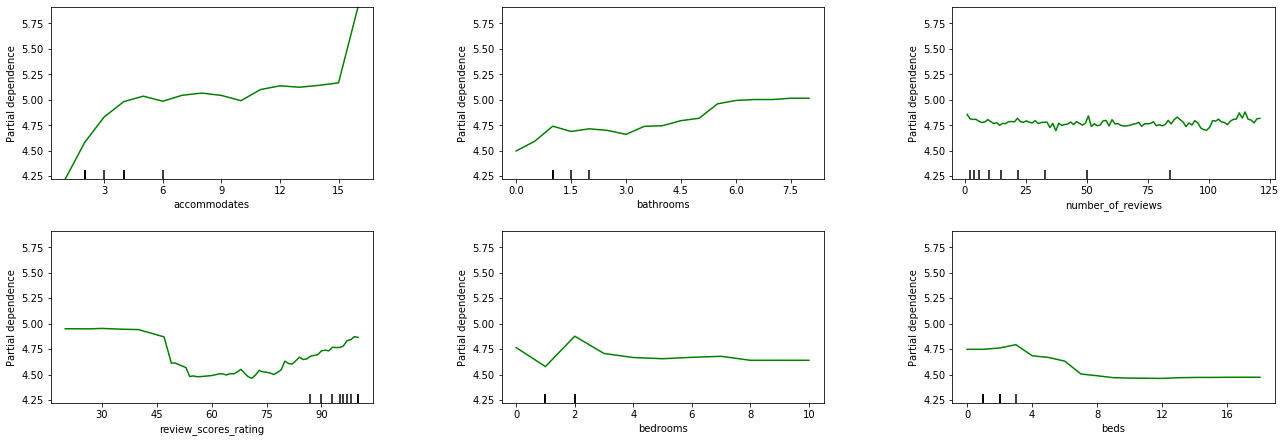

In [36]:
interpreter.plot_pdp_df(regr, data, 'log_price', [0,1,2,3,4,5])

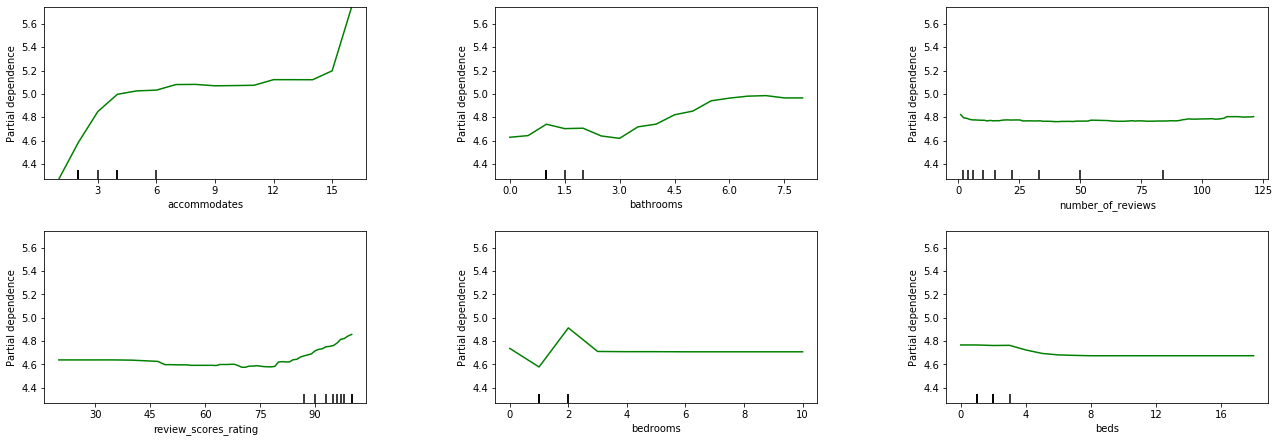

In [37]:
interpreter.plot_pdp_df(best_rfr, data, 'log_price', [0,1,2,3,4,5])

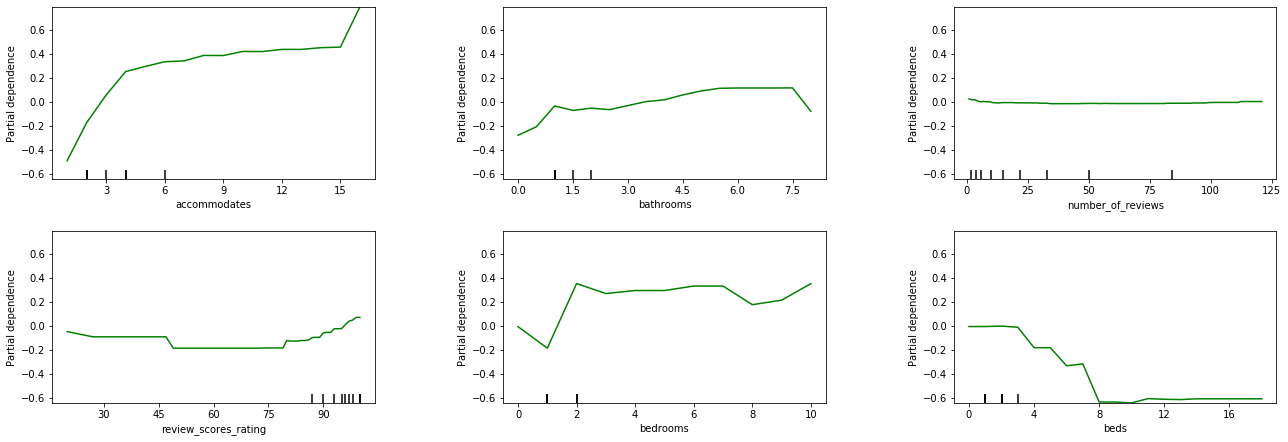

In [21]:
interpreter.plot_pdp_df(gbr, data, 'log_price', [0,1,2,3,4,5])

PDPs with two target features show the interactions among the two features:

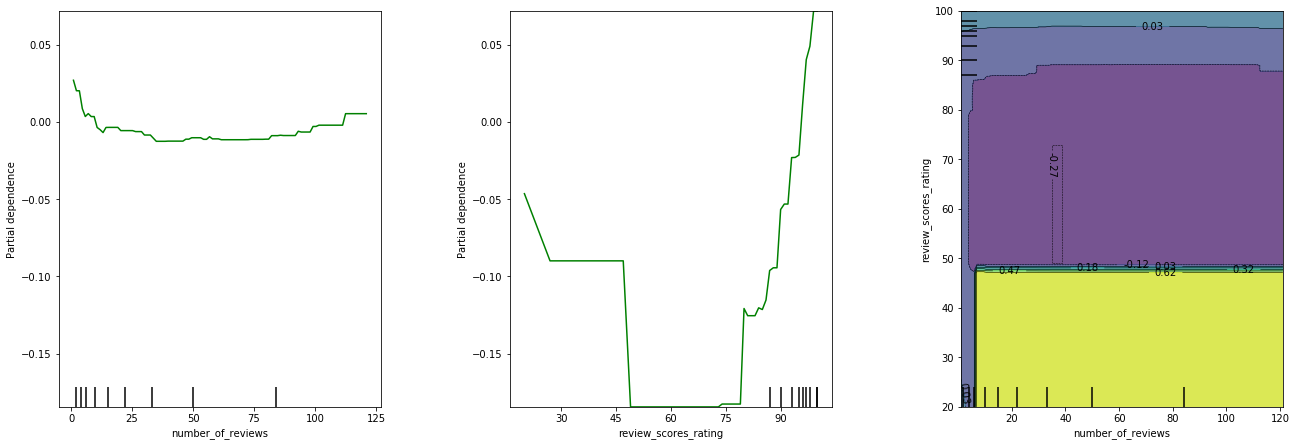

In [22]:
interpreter.plot_pdp_df(gbr, data, 'log_price', [2,3,(2,3)])

For classification:

In [26]:
data

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
1,5.129899,7,1.0,6,93.0,3.0,3.0
2,4.976734,5,1.0,10,92.0,1.0,3.0
4,4.744932,2,1.0,4,40.0,0.0,1.0
5,4.442651,2,1.0,3,100.0,1.0,1.0
7,4.787492,2,1.0,9,93.0,1.0,1.0
...,...,...,...,...,...,...,...
74102,4.110874,10,3.0,1,80.0,1.0,10.0
74103,5.135798,2,1.0,24,98.0,1.0,1.0
74107,5.043425,4,2.0,16,93.0,2.0,4.0
74108,5.220356,5,1.0,43,94.0,2.0,2.0


In [27]:
data['log_price_sup_5'] = data['log_price']>5

In [29]:
data_c = data.drop('log_price', axis=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
from sklearn.linear_model import LogisticRegression

In [33]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(data_c.loc[:, data_c.columns != 'log_price_sup_5'], data_c['log_price_sup_5'])  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
gbc = GradientBoostingClassifier()
gbc.fit(data_c.loc[:, data_c.columns != 'log_price_sup_5'], data_c['log_price_sup_5'])  

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
lr = LogisticRegression()
lr.fit(data_c.loc[:, data_c.columns != 'log_price_sup_5'], data_c['log_price_sup_5'])  

C:\Users\victo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

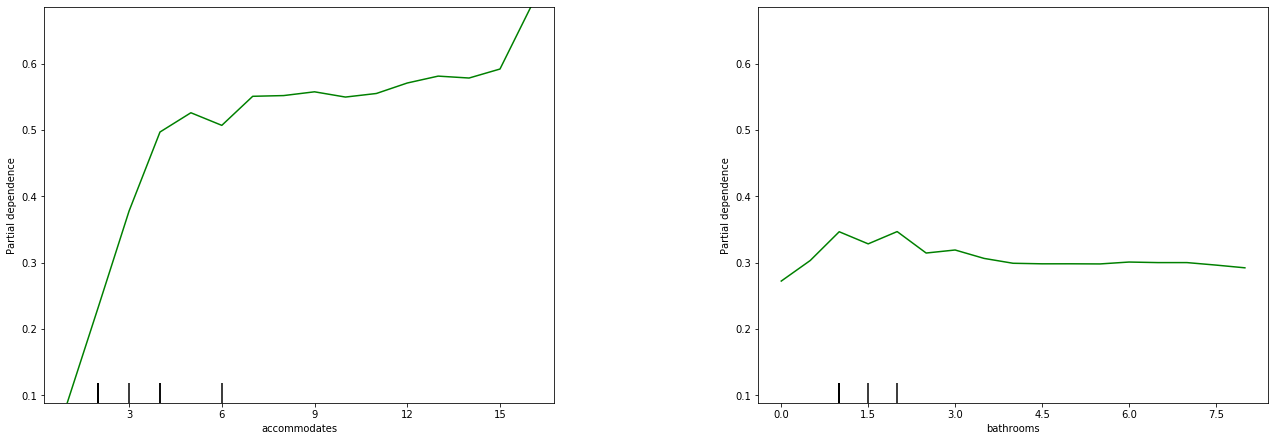

In [34]:
interpreter.plot_pdp_df(rfc, data_c, 'log_price_sup_5', [0,1])

In [39]:
data_c.columns

Index(['accommodates', 'bathrooms', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'log_price_sup_5'],
      dtype='object')

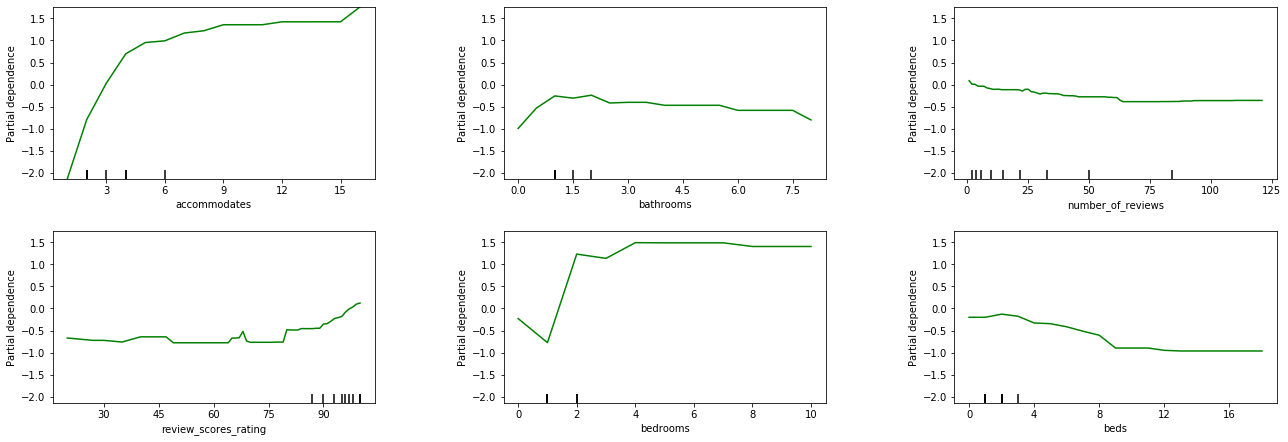

In [43]:
interpreter.plot_pdp_df(gbc, data_c, 'log_price_sup_5')

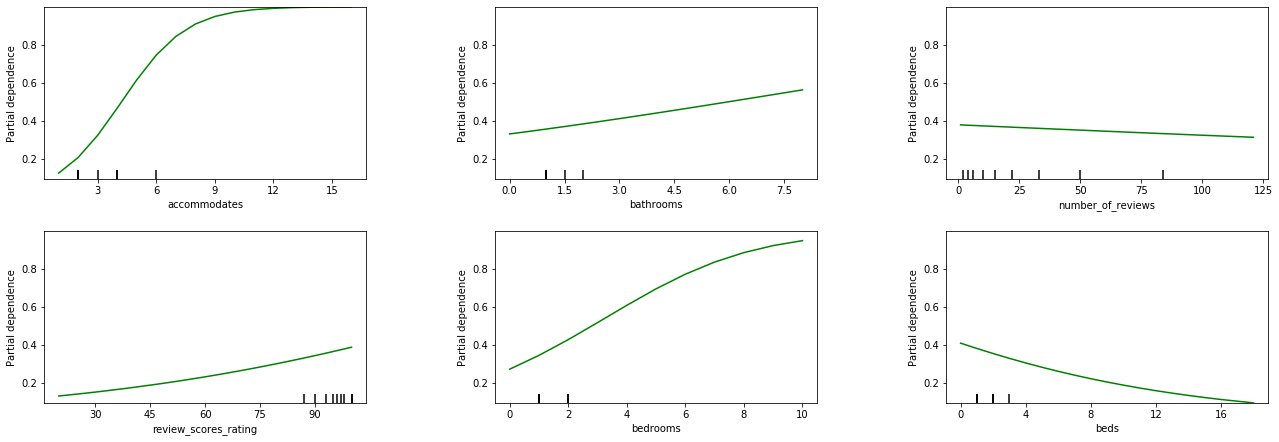

In [46]:
interpreter.plot_pdp_df(lr, data_c, 'log_price_sup_5')

### Even better: cross-validation of the black-box model before plotting the PDP

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [3]:
# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [4]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o